# Zillow Hoboken and Jersey City Housing Market Predictor

The following Jupyter notebook shows the creation of a housing market predictor thanks to the information visible on zillow. The project begins by scraping through the publicly available data on the zillow website and creating a dataset of houses from a specific zip code. In this case, Hoboken was used.

Afterwards, the data is cleaned and put into a pandas dataframe to run machine running algorithms. Before starting the project, feature extraction and linear regression models for price were my two main goals, and so I will look to include those within this project.

Both Beautiful Soup4 and Requests are needed to be installed into the python IDE for use.
![title](installation.png)

In [85]:
from lxml import html
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from math import sqrt

In [2]:
#Zillow returns captcha pages with the simple url "https://www.zillow.com/homes/Hoboken,-NJ_rb/" so this alternative is used
req_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}
with requests.Session() as s:
   url = 'https://www.zillow.com/homes/Hoboken,-NJ_rb/'
   r = s.get(url, headers=req_headers)

#Gets the src code from the Zillow website "Hoboken" search
src = r.content

soup = BeautifulSoup(src,'lxml')
links = soup.find_all("a",{"class":"list-card-link list-card-link-top-margin"},href=True)

print("Total number of Properties: ",len(links))


Total number of Properties:  40


Unfortunately, because Zillow limits its search results to a maximum of 40 a page, the URL above needed to constantly updated to the next page in order to get all of the links to each and every property.

Afterwards, a CSV file was available with the links to 1,171 properties in both Jersey City and Hoboken.

**csv_file = zillowpropertylinks.csv**

These would later be scrapped further and inserted into a pandas dataframe for machine learning algorithms to run through and extract features from. Initially, the project was going to be run for Hoboken only, but given machine learning works better with more data, Jersey City properties were also included.

In [3]:
propertylinks = pd.read_csv("zillowpropertylinks.csv")
print("Number of Total Links:",len(propertylinks))
propertylinks.head()

Number of Total Links: 1171


,Urls:
0,https://www.zillow.com/homedetails/1024-Adams-...
1,https://www.zillow.com/homedetails/1300-Grand-...
2,https://www.zillow.com/homedetails/117-Bloomfi...
3,https://www.zillow.com/homedetails/315-Monroe-...
4,https://www.zillow.com/homedetails/117-Bloomfi...


After manually looking through the URLs for listings on zillow, the following information was chosen to be extracted. I believed that this would give the most relevant information towards prices as this was noted as a summarized value at the top of most listings.

* Square Feet
* Bathrooms
* Bedrooms

and of course these would be used in a supervised learning approach against it's own listed price

* Price

---

Of course, this project can be improved in the future by extracting more information from zillow, as more is there, but I felt that these four features were sufficient enough for a proof of concept. Other things that are listed include:

* Floor Type
* Heating/Cooling System
* Parking Spaces
* Year Built
* Construction Material
* Total Rooms
* Architectural Style

In [4]:
data = np.empty([len(propertylinks),4],dtype="<U16")

for x in range(0,len(propertylinks)):
    with requests.Session() as s:
       url = propertylinks.loc[x,"Urls:"]
       r = s.get(url, headers=req_headers)

    content = r.content

    soup2 = BeautifulSoup(content,'lxml')
    summary = soup2.find("div",{"class":"ds-summary-row"})

    #From Summary Row get Bedrooms, Bathrooms and Square Feet
    try:
        addr_bbsqft = summary.findChildren("span",{"class":"ds-bed-bath-living-area"})
        for idx,n in enumerate(addr_bbsqft):
            data[x][idx+1] =n.get_text()
            
        #From Summary Row get Price
        addr_price = summary.findChild('h4')
        data[x][0] = addr_price.get_text()
    except AttributeError:
        print("There was no information for this listing: ", x)

info = pd.DataFrame(data,columns=["price","bedrooms","bathrooms","square feet"])
print(info)

There was no information for this listing:  90
There was no information for this listing:  130
There was no information for this listing:  212
There was no information for this listing:  216
There was no information for this listing:  222
There was no information for this listing:  273
There was no information for this listing:  278
There was no information for this listing:  281
There was no information for this listing:  300
There was no information for this listing:  320
There was no information for this listing:  344
There was no information for this listing:  377
There was no information for this listing:  389
There was no information for this listing:  413
There was no information for this listing:  485
There was no information for this listing:  558
There was no information for this listing:  584
There was no information for this listing:  631
There was no information for this listing:  633
There was no information for this listing:  639
There was no information for this listing

The above scraping program was run through a loop through all the listings available in the Jersey City and Hoboken area. As it scrapped through the data, it inserted it into an array of the correct size and went onto the next one. As a safety measure for the scraper, the scraping was put through a try and catch in order to not error out the program if any of the properties did not have all the information sufficiently. Instead, the listing would just be skipped and the next one would run.

Here is an example listing that did not have all the information available and was skipped in the program. (Number 90). As you can see, this value did not have a proper price listing and so supervised learning could not be used on it.

![title](missingdata.jpg)

In [5]:
info['square feet'].value_counts()

-- sqft       64
              59
600 sqft      13
750 sqft      12
1,200 sqft    12
              ..
2,465 sqft     1
1,779 sqft     1
3,444 sqft     1
309 sqft       1
3,464 sqft     1
Name: square feet, Length: 704, dtype: int64

In [6]:
info['bedrooms'].value_counts()

2 bd                346
1 bd                248
3 bd                209
4 bd                 94
6 bd                 51
5 bd                 51
-- bd                42
                     39
7 bd                 30
8 bd                 23
9 bd                  6
10 bd                 5
11 bd                 4
2,500 Square Fee      4
2,848 Square Fee      2
3,101 Square Fee      1
2,051 Square Fee      1
2,150 Square Fee      1
5,619 Square Fee      1
2,126 Square Fee      1
12 bd                 1
2,757 Square Fee      1
2,087 Square Fee      1
3,049 Square Fee      1
1,071 Square Fee      1
910 Square Feet       1
-- sqft               1
18 bd                 1
3,698 Square Fee      1
23 bd                 1
1,707 Square Fee      1
1,751 Square Fee      1
Name: bedrooms, dtype: int64

As you can see, even though some of the information is scrapped from the web, some of it may not be accurate or useful to our machine learning system, so for the next few steps we need to clean the data and prepare it for the machine learning algorithms. As can be seen in the bedrooms count as well, some of the values were missing data and so square feet values were placed into the area that should have had bedroom counts.

'-- sqft' AND '' values within the category should be removed and at the end the value should be parsed into an integer. Similarly, the price needs to be parsed into an int and the bedrooms and bathrooms should be searched and remove the values that are equal to 0, as those are incorrectly set in zillow.

In [28]:
info_filtered = info.copy()

import warnings
warnings.filterwarnings('ignore')

def strip_after_space(x):
    #If the value is a string, then remove anything after the first space symbol
    sep = ' '
    stripped = x.split(sep, 1)[0]
    stripped = stripped.replace(',','')
    stripped = stripped.replace('$','')

    if isinstance(x, str):
        return(stripped)
    return(x)
   
info_filtered['square feet'] = info_filtered['square feet'].apply(strip_after_space)
info_filtered['bedrooms'] = info_filtered['bedrooms'].apply(strip_after_space)
info_filtered['bathrooms'] = info_filtered['bathrooms'].apply(strip_after_space)
info_filtered['price'] = info_filtered['price'].apply(strip_after_space)

info_filtered = info_filtered[~info_filtered['square feet'].str.contains('-')]
info_filtered = info_filtered[~info_filtered['bedrooms'].str.contains('-')]
info_filtered = info_filtered[~info_filtered['bathrooms'].str.contains('-')]
info_filtered = info_filtered[~info_filtered['price'].str.contains('-')]
info_filtered = info_filtered[info_filtered['square feet'].str.len() > 0]
info_filtered = info_filtered[~info_filtered['price'].str.contains("Z|m|P")]


info_filtered['square feet'] = info_filtered['square feet'].astype('float')
info_filtered['bedrooms'] = info_filtered['bedrooms'].astype('float')
info_filtered['bathrooms'] = info_filtered['bathrooms'].astype('float')
info_filtered['price'] = info_filtered['price'].astype('float')


info_filtered

,price,bedrooms,bathrooms,square feet
0,2950000.0,4.0,5.0,3460.0
1,679900.0,2.0,1.0,983.0
2,520000.0,1.0,1.0,635.0
3,875000.0,3.0,2.0,1402.0
4,520000.0,1.0,1.0,635.0
...,...,...,...,...
1164,549000.0,2.0,1.0,1134.0
1167,625000.0,1.0,1.0,843.0
1168,550000.0,3.0,2.0,1489.0
1169,699000.0,2.0,2.0,1056.0


At this point in the program, all of the individual listings are filtered into float values which will be useful with our machine learning algorithm. However, there are still outliers due to inconsistencies with the scraper. For instance, bedrooms may have inaccurately scrapped square feet into that category and have very large numbers. This happens when one of the values is empty so it assumes the next one and leaves the last one blank. However, after checking the values, it appears that the previous filtering did the work of dropping those values already, as 'square feet', the last category, would have been empty in all of those instances and those were filtered out. 

At the end of the filtering process, 981 properties were still available out of the 1171 that were initially scraped.

In [30]:
info_filtered['bedrooms'].value_counts()

2.0     332
1.0     230
3.0     188
4.0      85
5.0      44
6.0      44
7.0      25
8.0      20
9.0       6
10.0      4
11.0      2
12.0      1
Name: bedrooms, dtype: int64

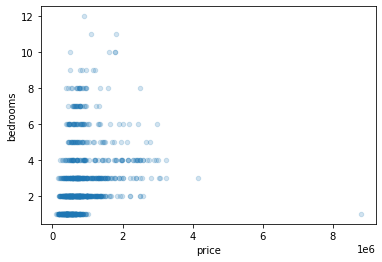

In [43]:
import matplotlib.pyplot as plt

info_filtered.plot(kind="scatter", x="bedrooms", y="price", alpha=0.2)

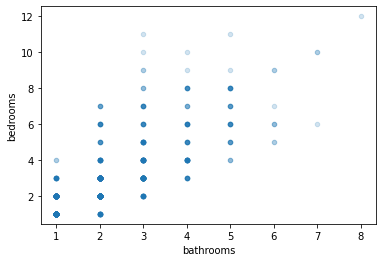

In [47]:
info_filtered.plot(kind="scatter", x="bathrooms", y="bedrooms", alpha=0.2)

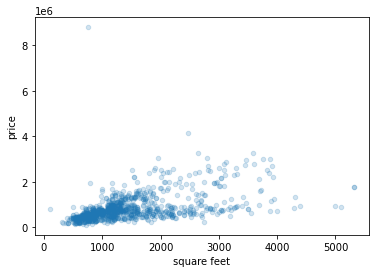

In [45]:
info_filtered.plot(kind="scatter", x="square feet", y="price", alpha=0.2)

The data is visualized above to see if there are any trends or patterns among the listings. It appears at first glance that as square footage goes up price slightly increases. Similarly, more bedrooms usually has a positive correlation to more bathrooms.

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV

#Split up the given data into two separate arrays, one of training data and one of validation data
train, test = train_test_split(info_filtered, test_size=0.2,random_state=1)

X_train = train.drop(columns=['price'])
Y_train = train['price']
X_test = test.drop(columns=['price'])
Y_test = test['price']

print("Training Data Size:", len(train))
print("Testing Data Size:", len(test))

Training Data Size: 784
Testing Data Size: 197


In [59]:
MSE_null = 0

for x in Y_test:
    MSE_null += (Y_train.mean() - x)**2
    
MSE_null = MSE_null / len(Y_test)
print("Assuming the average case is taken as an estimate, this is the MSE value found. We look to beat this")
print("MSE_Null value: ", MSE_null)

Assuming the average case is taken as an estimate, this is the MSE value found. We look to beat this
MSE_Null value:  553613698055.2928


In [87]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, Y_train)

Y_pred = forest_reg.predict(X_test)

y = sorted(zip(forest_reg.feature_importances_, X_train.columns), reverse=True)

print(y)

[(0.6670050679460154, 'square feet'), (0.1703965920139047, 'bathrooms'), (0.16259834004007984, 'bedrooms')]


Based on the feature extraction of the Random Forest Regressor, it can be seen that the total amount of square feet actually dictates the price of a house far more than the bedrooms or bathrooms does. What's also interesting is actually how close the bedrooms and bathrooms are to dictating the price. In this case, it barely shows any difference between the two so people don't have any preference between bedroom and bathrooms when it comes between them paying more. 

In [88]:
MSE_RandomForest = 0

for idx, val in enumerate(Y_test):
    MSE_RandomForest += (Y_pred[idx] - val)**2
    
MSE_RandomForest = sqrt(MSE_RandomForest / len(Y_test))
print("This is the MSE value after running with a random forest.")
print("MSE_RandomForest value: ", MSE_RandomForest)
print("Forest Regressor Score: ",forest_reg.score(X_test, Y_test))

This is the MSE value after running with a random forest.
MSE_RandomForest value:  696155.6359803266
Forest Regressor Score:  0.12315385239066778


In [58]:
#Fine-tuned Random Forest HyperParameters
from sklearn.model_selection import RandomizedSearchCV

x1=[1,2,3,4,5,6,7,8,9,10]
x2=[2,3,4,5,6,7,8,9,10]
x3=[None,2,3,4,5,6,7,8,9,10]
x4=[100,200,300,400,500]
x5=["auto","sqrt","log2",3,4,5,6,7,8,9,10]

param_grid = [
    {'n_estimators':x4,'max_depth':x3,'max_features':x5,
     'max_leaf_nodes':x3,"min_samples_leaf":x1,}
]

search = RandomizedSearchCV(forest_reg,param_grid,n_iter=100,cv=5,random_state=1)
search.fit(X_train,Y_train)

print("Best parameters:", search.best_params_)

Best parameters: {'n_estimators': 100, 'min_samples_leaf': 3, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 9}


In [60]:
#Fine-tuned attempt at Random Forest Classification
forest_reg = RandomForestRegressor(n_estimators=100,min_samples_leaf=3,max_leaf_nodes=None,max_features="sqrt",max_depth=9)
forest_reg.fit(X_train, Y_train)

Y_pred = forest_reg.predict(X_test)

sorted(zip(forest_reg.feature_importances_, X_train.columns), reverse=True)

[(0.5146885357684571, 'square feet'),
 (0.24707834773459553, 'bathrooms'),
 (0.23823311649694742, 'bedrooms')]

In [86]:
MSE_RandomForest = 0

for idx, val in enumerate(Y_test):
    MSE_RandomForest += (Y_pred[idx] - val)**2
    
MSE_RandomForest = sqrt(MSE_RandomForest / len(Y_test))
print("This is the MSE value after running with a random forest.")
print("RMSE_RandomForest value: ", MSE_RandomForest)
print("Forest Regressor Score: ",forest_reg.score(X_test, Y_test))

This is the MSE value after running with a random forest.
RMSE_RandomForest value:  680065.0516624679
Forest Regressor Score:  0.16321935624973982


After running the RandomizedSearchCV, the machine learning algorithm is able to look for better hyperparameters to try and find more correlations. The RandomizedSearchCV also runs through cross-validation in order to allow for less variance between different test/train cases and get a more accurate prediction.

After the RandomizedSearchCV finished, a new random forest regressor was created with the best parameters of the previous one and ran again to see the feature importance values and the MSE/Regressor Score again. Both seemed to improve when the square footage was taken to be less important then initially expected and by having bathrooms a little more important than bedrooms. This follows traditional knowledge in house hunting as bathrooms, especially when sharing an apartment are more important when it comes to multiple bedroom houses. 

Interestingly, these values are only run through house purchases and not rental properties, but the same knowledge holds true.

In the future, I expect that adding more of the previously noted categories will be able to more accurately measure the price of a home versus its estimated price. With a score of 0.16 this is a fairly useless algorithm at its current state, but there is much more than can be done to improve it. Below is a table of estimations using this algorithm versus actual prices to understand more effectively how accurate the algorithm is.

In [67]:
sorted(zip(Y_pred,Y_test,(Y_pred - Y_test)))

[(304941.25732044876, 179000.0, 125941.25732044876),
 (305749.2823602467, 187900.0, 117849.2823602467),
 (305749.2823602467, 187900.0, 117849.2823602467),
 (305749.2823602467, 234000.0, 71749.2823602467),
 (305749.2823602467, 329000.0, -23250.717639753304),
 (306525.4583442583, 360000.0, -53474.54165574169),
 (307202.6543442583, 415000.0, -107797.3456557417),
 (320383.0963282127, 325000.0, -4616.903671787295),
 (363125.8110509034, 379000.0, -15874.188949096599),
 (364324.9598156039, 465000.0, -100675.04018439609),
 (370397.1648030722, 415000.0, -44602.83519692777),
 (373732.25070661306, 190000.0, 183732.25070661306),
 (376901.00933756545, 384900.0, -7998.990662434546),
 (382054.7290485028, 465000.0, -82945.2709514972),
 (383882.9663068002, 400000.0, -16117.033693199803),
 (396745.3686105091, 439000.0, -42254.63138949091),
 (405358.8700858475, 499000.0, -93641.1299141525),
 (422530.69115259574, 224900.0, 197630.69115259574),
 (422530.69115259574, 455000.0, -32469.30884740426),
 (429552.

In the column above, the leftmost column is the estimated prices of houses, the middle column the actual price, and the right column the price difference.